# Introduction:

This jupyter notebook is a recap of all the useful codes I used to analyse the DUO simulations. Especially to make the plots shown in the report.

Author: Thomas Lejeune

Contacts:

thomas.c.lejeune [at] durham [dot] ac [dot] uk

thomas.lejeune [at] ens-paris-saclay [dot] fr


# Imports and rcParams

In [45]:
import numpy as np
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import Normalize, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.constants as const
from matplotlib.ticker import (MultipleLocator)


plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.linewidth'] = 1.2

plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams["font.family"] = "Fira Sans" #or STIX General
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams['font.size']       = 20

# 87Rb133Cs analysis

## PEC, ETDM and SO coupling

Text(5, 14, 'b${}^3\\Pi_0$')

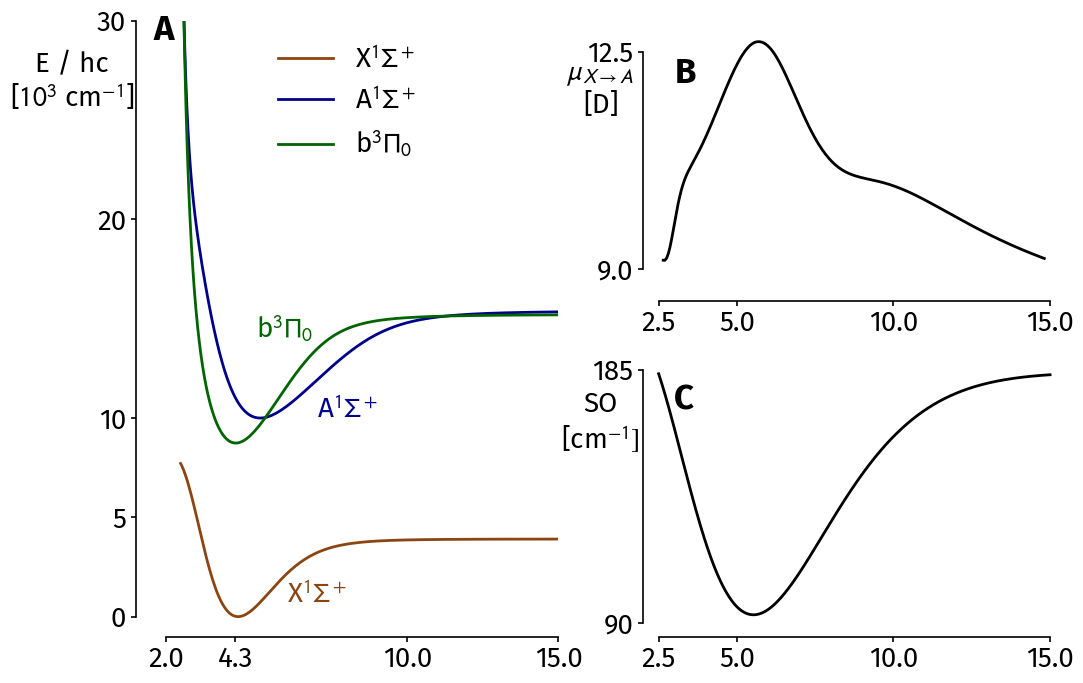

In [15]:
#Loading the data

Rdip, Dip = np.loadtxt("data/dipole_A_X.dat", unpack=True)
RX, VX = np.loadtxt("data/X1Sigma.dat", unpack=True, skiprows=1)
RA, VA = np.loadtxt("data/A1Sigma.dat", unpack=True, skiprows=1) 
Rb, Vb = np.loadtxt("data/b3pi0.dat", unpack=True, skiprows=1) 
RSO, SO = np.loadtxt("data/SO.dat", unpack=True)


# Create figure and GridSpec
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2)

ax = fig.add_subplot(gs[:, 0])
ax_top_right = fig.add_subplot(gs[0, 1]) 
ax_bottom_right = fig.add_subplot(gs[1, 1], sharex=ax_top_right) 

Xlim = [[1,15], [2,15.5], [2,15.5]]
Xticks = [[2,4.3,10,15], [2.5,5,10,15], [2.5,5,10,15]]
Bottom_bounds = [[2,15], [2.5,15], [2.5,15]]
Ylim = [[-1,30], [8.5,13], [85,190]]
Yticks = [[0,5,10,20,30], [9,12.5], [90,185]]
Left_bounds = [[0,30], [9,12.5], [90,185]]
YLabels = ["E / hc\n[$10^3$ cm$^{-1}$]", "$\\mu_{X \\rightarrow A}$ \n[D]", "SO\n[cm${}^{-1}]$"]
Label_coords = [[-0.15, 0.85], [-0.1, 0.65], [-0.1, 0.65]]

# Plot data
ax.plot(RX, VX*1e-3, lw=2, label=r"X$^1\Sigma^+$", color="saddlebrown")
ax.plot(RA, VA*1e-3, lw=2, label=r"A$^1\Sigma^+$", color="darkblue")
ax.plot(Rb, Vb*1e-3, lw=2, label=r"b$^3\Pi_0$", color="darkgreen")

ax_top_right.plot(Rdip, Dip, color="black", lw=2)

ax_bottom_right.plot(RSO, SO, color="black", lw=2)


for i, axis in enumerate([ax, ax_top_right, ax_bottom_right]):
    axis.set_xlim(Xlim[i])
    axis.set_xticks(Xticks[i])
    axis.set_ylim(Ylim[i])
    axis.set_yticks(Yticks[i])
    axis.spines["bottom"].set_bounds(Bottom_bounds[i])
    axis.spines["left"].set_bounds(Left_bounds[i])
    axis.set_ylabel(YLabels[i], rotation=0)
    axis.yaxis.set_label_coords(*Label_coords[i])
# Annotations and legend
ax.annotate("A", (1.6, 29), weight="bold", fontsize=25)
ax_top_right.annotate("B", (3, 12), weight='bold', fontsize=25)
ax_bottom_right.annotate("C", (3, 170), weight='bold', fontsize=25)

ax.legend(frameon=False, loc="upper center")
ax.annotate(r"X${}^1\Sigma^+$",(6,0.7), color="saddlebrown")
ax.annotate(r"A${}^1\Sigma^+$",(7,10), color="darkblue")
ax.annotate(r"b${}^3\Pi_0$",(5,14), color="darkgreen")



# LEVEL16 - DUO comparison

C:\Users\Armin\AppData\Local\Temp\ipykernel_7676\1022153688.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


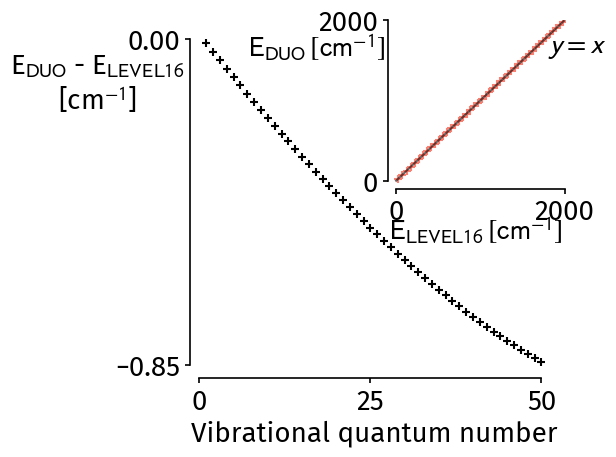

In [ ]:
#Load LEVEL16 data
E16,V16 = [], []
filename = "data/X.7"
with open(filename, "r") as file:
    lines = file.readlines()
    for i in range(3, len(lines)):
        data = lines[i].split()
        if data[1] == "0":
            E16.append(float(data[2]))
            V16.append(int(data[0]))


ZPE = 24.783342 #from DUO output file

plt.figure()
#from DUO output file
Vduo, Eduo = np.loadtxt("data/X_ener.dat", usecols=[1,2], unpack=True)

plt.scatter(Vduo, Eduo+ZPE - E16[:50], color="black", marker="+", ls="solid")
# plt.legend()
plt.xlabel("Vibrational quantum number")
plt.ylabel("E${}_\\text{DUO}$ - E${}_\\text{LEVEL16}$\n[cm$^{-1}$]", rotation=0)
ax = plt.gca()
ax.spines[["top","right"]].set_visible(False)
ax.set_xticks([0,25,50])
ax.spines["bottom"].set_bounds(0,50)

ax.set_yticks([0,-0.85])
ax.spines["left"].set_bounds(0,-0.85)

ax.spines[["left", "bottom"]].set_linewidth(1.2)


axins = inset_axes(ax, width="48%", height="48%", 
                  bbox_to_anchor=(0.5, 0.5, 1, 1),
                  bbox_transform=ax.transAxes,
                  loc=3)

axins.spines[["left", "bottom"]].set_linewidth(1.2)
axins.scatter(Eduo+ZPE, E16[:50], marker="+", color="salmon")
axins.plot([i for i in range(2000)], color="black", alpha=0.6)
axins.set_xlim(-100,2000)
axins.set_ylim(-100,2000)
axins.spines[["bottom","left"]].set_bounds(0,2000)
axins.set_xticks([0,2000])
axins.set_yticks([0,2000])
axins.annotate("$y=x$", (1800, 1600))
ax.set_clip_on(False)
axins.set_xlabel(r"$\text{E}_\text{LEVEL16} \: [\text{cm}^{-1}]$")
axins.set_ylabel(r"$\text{E}_\text{DUO} \: [\text{cm}^{-1}]$", rotation=0)

ax.yaxis.set_label_coords(-0.25, 0.75)  # Adjust these values as needed
axins.yaxis.set_label_coords(-0.4, 0.75)  # Adjust these values as needed
axins.xaxis.set_label_coords(0.5, -0.15)  # Adjust these values as needed
plt.tight_layout()
# plt.savefig("compar_level_duo_sans.svg")


# Convergence study


C:\Users\Armin\AppData\Local\Temp\ipykernel_7676\1981903230.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


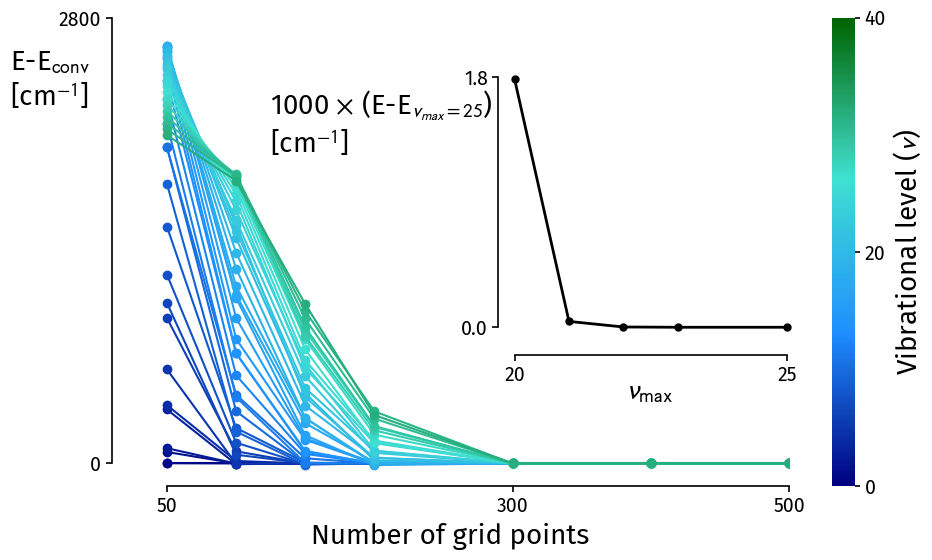

In [28]:

#Load the data
vmax = 49
J,E,V = [[] for _ in range(vmax+1)], [[] for _ in range(vmax+1)], []
Mesh = []
ZPE = []
for filename in glob.glob("data/GS_converg/mesh*"):
    j, e, v = np.zeros(vmax+1), np.zeros(vmax+1), np.zeros(vmax+1)
    with open(filename, "r") as file:
        mesh_size = filename[20:-4]
        Mesh.append(int(mesh_size))
        lines = file.readlines()
        table_index = []
        for i, line in enumerate(lines):
            if "Eigenvalues for J = " in line:
                table_index.append(i)
            if "Zero point energy (ZPE) =" in line:
                ZPE.append(float(line.split()[-1]))
        for index in table_index:
            for i in range(index+3, index+3+vmax+1):
                data = lines[i].split()
                ind = i-index-3
                vib_level = int(data[4])
                J[vib_level].append(float(data[0]))
                E[vib_level].append(float(data[2]))
                V.append(vib_level)
sorted_indices = np.argsort(Mesh)
sorted_mesh = np.array(Mesh)[sorted_indices]


# Define a custom colormap
colors = [(0, "navy"), (0.33, "dodgerblue"), (0.66, "turquoise"), (1, "darkgreen")]
custom_cmap = LinearSegmentedColormap.from_list("custom", colors)
colors = custom_cmap(np.linspace(0, 1, len(E)))
norm = Normalize(vmin=0, vmax=40)

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))



# Plot data
for i in range(40):
    color = colors[i]
    sorted_energy = (np.array(E[i]) - E[i][-1])[sorted_indices]
    ax.plot(sorted_mesh, sorted_energy, ls='solid', marker='o', color=color, markersize=6)

# === Axis Labels ===
ax.set_xlabel("Number of grid points", labelpad=5)
# ax.set_ylabel("Energy deviation from\nconverged value (cm$^{-1}$)",  rotation=0,ha='center', va='bottom')

ax.set_ylabel(r"E-E${}_\text{conv}$"+"\n[cm$^{-1}$]",  rotation=0,ha='left', va='bottom')
# ax.yaxis.set_label_coords(-0.15, 1.02)
# ax.set_position([0.2, 0.15, 0.65, 0.75])

# === Ticks ===
ax.tick_params(
    axis='both', 
    direction='out',
    color='black',
    width=1.2,
    length=4,
    labelsize=14
)

ax.spines[["top", "right"]].set_visible(False)
ax.spines["bottom"].set_bounds(50, 500)
ax.set_xticks([50, 300, 500])
ax.set_xlim(10, 500)
ax.spines["left"].set_bounds(0, 2800)
ax.set_yticks([0, 2800])
ax.spines[["left", "bottom"]].set_linewidth(1.2)
ax.set_clip_on(True)

# === Colorbar ===
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label="Vibrational level ($v$)")
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='out', color='black', labelsize=14, width=1.2)
cbar.set_ticks([0, 20, 40])

# === Inset ===
axins = inset_axes(ax, width="45%", height="60%", 
                  bbox_to_anchor=(0.55, 0.25, 1, 1),
                  bbox_transform=ax.transAxes,
                  loc=3)

axins.patch.set_alpha(0.9)
axins.patch.set_linewidth(0.8)

vmax = [20,21,22,23,25]
Ev = [902.785561,902.783818,902.783778,902.783776,902.783776]
ZPE = 24.783342
axins.plot(vmax, 1000*(np.array(Ev)-Ev[-1]), marker="o", ms=5, lw=2, color="black")
axins = plt.gca()
axins.set_ylabel(r"1000 $\times$ (E-E${}_{v_{max}=25}$)"+"\n[cm$^{-1}$]", rotation=0, ha="left")
axins.set_xlabel(r"$\nu_{\text{max}}$", labelpad=-5)

axins.spines[["left", "bottom"]].set_color("black")
axins.spines[["left", "bottom"]].set_linewidth(1.2)
axins.spines[["right", "top"]].set_visible(False)
axins.set_xlim(19.7,25.3)
axins.spines["bottom"].set_bounds(20,25)
axins.set_xticks([20,25])
axins.set_ylim(-0.2, 1.82)
axins.spines["left"].set_bounds(0,1.8)
axins.set_yticks([0,1.8])
axins.tick_params(
    axis='both', 
    direction='out',
    color='black',
    width=1.2,
    length=4,
    labelsize=14
)
ax.yaxis.set_label_coords(-0.15, 0.8) 
axins.yaxis.set_label_coords(-0.75, 0.7) 

plt.tight_layout()
# plt.savefig("econv_sans.svg")

## Mixing coefficients

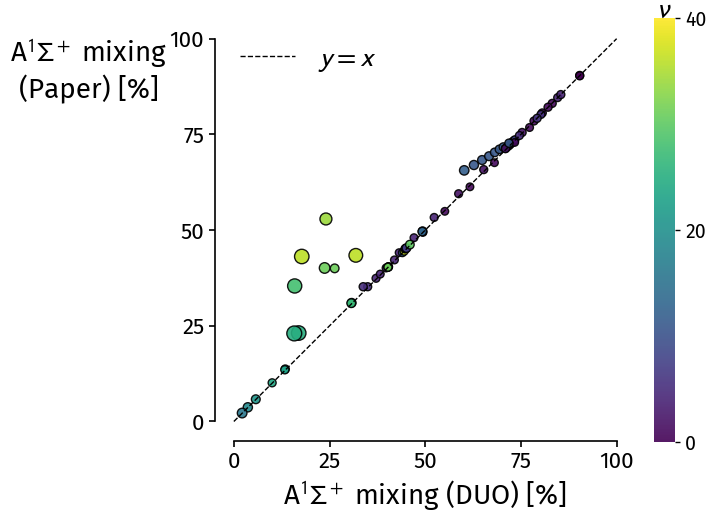

In [33]:

I, J, v, Eexpt, Eduo, diff, Aduo, bduo, Apaper, bpaper = np.loadtxt(
    "diff/parity_filter_j0-10_70-80_v200.diff",
    unpack=True,
    skiprows=2,
    usecols=[0,2,3,4,5,6,7,8,9,10]
)
# Create figure + axes
fig, ax = plt.subplots(figsize=(8,8))
sizes = 30+(np.abs(diff)*100)
scatter = ax.scatter(
    Aduo, Apaper,
    s=sizes,  # Use the sizes variable for point sizes
    c=v,      # Color by the same values used in hexbin
    cmap='viridis',  # Use the same colormap
    alpha=0.9,
    edgecolors='k',
    clim = (0,40)
)
# Identity line
ax.plot([0,100],[0,100], 'k--', lw=1, label=r"$y=x$")

# Labels & title
ax.set_xlabel(r"A${}^1\Sigma^+$ mixing"+" (DUO) [%]")
ax.set_ylabel(r"A${}^1\Sigma^+$ mixing"+"\n(Paper) [%]", rotation=0)
# ax.set_title("A¹Σ⁺ Mixing Comparison\n(hexbin color = ⟨|ΔE|⟩)")

# Make the plotting region square
ax.set_aspect('equal', 'box')

# Legend for the identity line
ax.legend(loc='upper left',frameon=False)

# Colorbar (outside the square axes)
cbar = fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label(r"$\nu$", rotation=0)
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='out', color='black', labelsize=14, width=1)


# cbar.set_clim(0, 1)
ax.spines[["top","right"]].set_visible(False)
ax.spines[["bottom","left"]].set_bounds(0,100)
ax.set_xticks([0,25,50,75,100])
ax.set_yticks([0,25,50,75,100])
ax.tick_params(
    axis='both', 
    direction='out',
    color='black',
    width=1.2,
    length=4,
    labelsize=16
)


ax.yaxis.set_label_coords(-0.3, 0.8)
cbar.ax.yaxis.set_label_coords(0.5,1.05)
cbar.ax.set_yticks([0,20,40])

pos_ax = ax.get_position()
pos_cbar = cbar.ax.get_position()
cbar.ax.set_position([pos_cbar.x0, pos_cbar.y0, pos_cbar.width, pos_ax.height])

plt.tight_layout()
# plt.savefig("Acoeff_sans.svg")
plt.show()

# Transitions

In [36]:
def parse_duo_transitions(filename, emission=True):
    """
    Parses a DUO output file for transition data.
    Returns structured array with fields: 'ji', 'jf', 'ei', 'ef', 's_if', 'a_if', 'vi', 'vf'
    """
    try:
        # Read all lines at once
        lines = Path(filename).read_text().splitlines()
        
        # Find header line
        if emission:
            header_idx = next((i for i, line in enumerate(lines) 
                          if "J Gamma ->" in line and "S(i->f)" in line and "A(if)" in line), -1)
        else:
            header_idx = next((i for i, line in enumerate(lines) 
                if "J Gamma <-" in line and "S(f<-i)" in line and "A(if)" in line), -1)
            print(header_idx)
        if header_idx == -1:
            print(f"Header not found in {filename}")
            return np.array([])
            
        # Process data lines that follow header
        data_rows = []
        for line in lines[header_idx+1:]:
            if not line.strip():
                continue
                
            parts = line.split()
            if len(parts) < 12:
                break
                
            try:
                # Extract state info from the last part of the line
                state_info = line.split(')->(')

                if not emission:
                    state_info = line.split(')<-(')
                if len(state_info) == 2:
                    # Extract initial state info
                    initial_state = state_info[0].split('(')[1].strip()
                    initial_parts = initial_state.split()
                    vi = int(initial_parts[1])
                    si = int(initial_parts[0])
                    # Extract final state info
                    final_state = state_info[1].split(')')[0].strip()
                    final_parts = final_state.split()
                    vf = int(final_parts[1])
                    sf  = int(final_parts[0])
                    # [Ji, Jf, Ei, Ef, S(i->f), A(if), vi, vf]
                    data_rows.append([
                        float(parts[0]), float(parts[3]), 
                        float(parts[6]), float(parts[8]), 
                        float(parts[10]), float(parts[11]),
                        vi, vf, si, sf
                    ])
                else:
                    # If state info not found, skip this line
                    continue
            except (ValueError, IndexError) as e:
                print(f"Error parsing line: {e}")
                continue
        
        if not data_rows:
            return np.array([])
            
        # Convert to structured array
        result = np.zeros(len(data_rows), dtype=[
            ('ji', float), ('jf', float), ('ei', float), 
            ('ef', float), ('s_if', float), ('a_if', float),
            ('vi', int), ('vf', int), ('si', int), ('sf', int)
        ])
        
        # Fill fields
        data = np.array(data_rows)
        result['ji'] = data[:, 0]
        result['jf'] = data[:, 1]
        result['ei'] = data[:, 2]
        result['ef'] = data[:, 3]
        result['s_if'] = data[:, 4]  # Store S(i->f) directly
        result['a_if'] = data[:, 5]
        result['vi'] = data[:, 6]
        result['vf'] = data[:, 7]
        result['si'] = data[:, 8]
        result['sf'] = data[:, 9]

        
        print(f"Extracted {len(result)} transitions")
        return result
        
    except Exception as e:
        print(f"Error processing file: {e}")
        return np.array([])

def main(filename='out/test1.out'):
    # Parse transition data
    data = parse_duo_transitions(filename)

    if data.size > 0:
        # Show sample data
        print("\nSample data (first 3 rows):")
        for row in data[:3]:
            print(f"J: {row['ji']} → {row['jf']}, v: {row['vi']} → {row['vf']}, " 
                  f"S(i->f): {row['s_if']:.4e}, A(if): {row['a_if']:.4e}")
        
        # Basic statistics
        print("\nStats:")
        print(f"Avg S(i->f): {np.mean(data['s_if']):.4e}")
        print(f"Avg A(if): {np.mean(data['a_if']):.4e}")
        print(f"Max A(if): {np.max(data['a_if']):.4e}")
        return data
    else:
        print("No data extracted")
        return 0

98403
Extracted 269 transitions
Extracted 42712 transitions
0.506471182
4.12930339
transition energy:  10692.5409


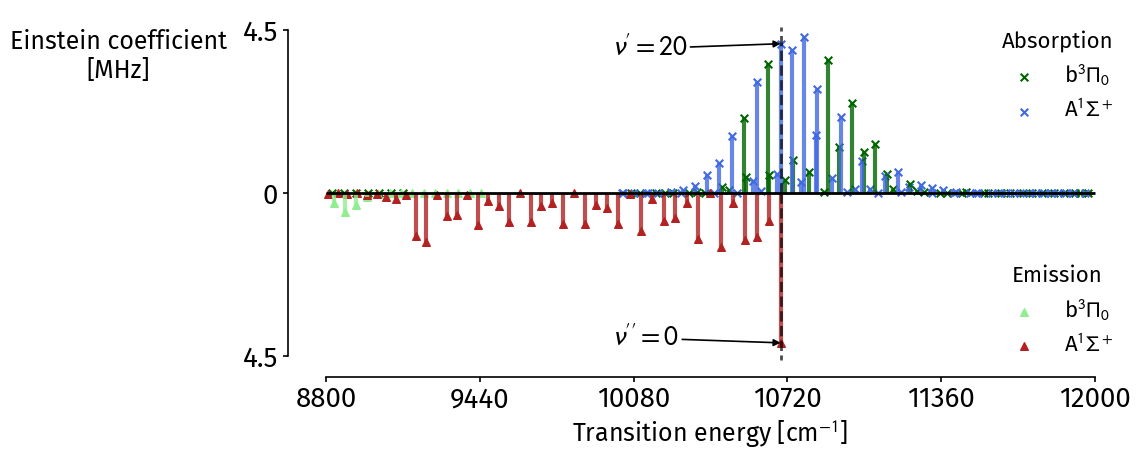

In [ ]:
abs = parse_duo_transitions(filename="../DUO_output/absorption.out", emission=False)
mask = (abs["jf"] == 1) & (abs["vf"]==0) & (abs["ji"]==0) #reversed because it is absorption - need to change that
def nm_to_cm_1(E):
    return 1e7/E
def cm_1_to_nm(E):
    return 1e7/E
fig, ax = plt.subplots(figsize=(12,5))

C = ["royalblue", "darkgreen"]
Labels = ["A$^1\\Sigma^+$", "b$^3\\Pi_0$"]
abs_handles = []
for s in [3,2]:
    abs_masked = abs[mask & (abs["si"]==s) & (abs["ei"]- abs["ef"]>8800)]
    nu = abs_masked["ei"] - abs_masked["ef"]
    A = abs_masked["a_if"]*1e-6
    h = ax.scatter(nu, A, label=Labels[s-2], color=C[s-2], marker="x", s=30)
    ax.vlines(nu,0, A, color=C[s-2], lw=3, alpha=0.8)
    abs_handles.append(h)
ax.set_xlabel("Transition energy [cm$^{-1}$]", fontsize=18)
ax.set_ylabel("Einstein coefficient\n[MHz]", rotation=0, fontsize=18)
ax.yaxis.set_label_coords(-0.15, 0.8) 
ax.set_clip_on(False)
ax.vlines(nm_to_cm_1(935), 0, 4.6, color="black", ls="dashed", lw=2, label="935 nm", alpha=0.7)
ax.legend(frameon=False)

# Find the point closest to 10695 cm^-1
target_x = 10695
closest_idx = np.abs(nu - target_x).argmin()
closest_x = nu[closest_idx]
closest_y = A[closest_idx]
# Annotate with an arrow from right of the text to the marker
ax.annotate(
    r"$\nu'=20$",
    xy=(closest_x, closest_y),
    xytext=(10000, 4),
    ha="left",
    va="center",
    fontsize=20,
    arrowprops=dict(
        arrowstyle="-|>",       # More stylized than simple "->"
        lw=1.2,
        color="black",
        shrinkA=0, shrinkB=0,
        mutation_scale=10,      # Controls arrowhead size
    ),
)


em = parse_duo_transitions(filename="../DUO_output/emission.out", emission=True)
mask = (em["jf"] == 1) & (em["vi"]==20) & (em["ji"]==0) #reversed because it is absorption - need to change that

C = ["firebrick", "lightgreen"]
Labels = ["A$^1\\Sigma^+$", "b$^3\\Pi_0$"]
em_handles = []
for s in [3,2]:
    em_masked = em[mask & (em["si"]==s) & (em["ei"]- em["ef"]>8800)]
    nu = em_masked["ei"] - em_masked["ef"]
    print(np.max(em_masked["a_if"])*1e-6)
    A = em_masked["a_if"]*1e-6
    h = ax.scatter(nu, -A, label=Labels[s-2], color=C[s-2], marker="^", s=30)
    ax.vlines(nu,0, -A, color=C[s-2], lw=3, alpha=0.8)
    em_handles.append(h)


ax.yaxis.set_label_coords(-0.2, 0.8) 
ax.set_clip_on(False)
ax.vlines(nm_to_cm_1(935), 0, -4.6, color="black", ls="dashed", lw=2, label="935 nm", alpha=0.7)
ax.legend(frameon=False, loc="lower right")

# Find the point closest to 10695 cm^-1
target_x = 10695
closest_idx = np.abs(nu - target_x).argmin()
closest_x = nu[closest_idx]
closest_y = A[closest_idx]
print("transition energy: ", closest_x)
# Annotate with an arrow from right of the text to the marker
ax.annotate(
    r"$\nu''=0$",
    xy=(closest_x, -closest_y),
    xytext=(10000, -4),
    ha="left",
    va="center",
    fontsize=20,
    arrowprops=dict(
        arrowstyle="-|>",       # More stylized than simple "->"
        lw=1.2,
        color="black",
        shrinkA=0, shrinkB=0,
        mutation_scale=10,      # Controls arrowhead size
    ),
)

plt.hlines(0,8800,12000, color="black", lw=2)

legend_abs = ax.legend(handles=abs_handles, frameon=False, loc="upper right", fontsize=16, title="Absorption", title_fontsize=16)
ax.add_artist(legend_abs)

legend_em = ax.legend(handles=em_handles, frameon=False, loc="lower right", fontsize=16, title="Emission", title_fontsize=16)

ax.spines["left"].set_bounds(-4.5, 4.5)
ax.set_yticks([-4.5,0,4.5])
ax.set_yticklabels([4.5,0,4.5])

ax.annotate(r"$\mid$ X$^1\Sigma^+, \nu''=0,J''=1\rangle \rightarrow \mid A^1\Sigma^+ - \text{b}^3\Pi_0, \nu',J'=0\rangle$ ", (8600,3))
ax.annotate(r"$\mid$ X$^1\Sigma^+, \nu'',J''=1\rangle \leftarrow \mid A^1\Sigma^+ - \text{b}^3\Pi_0, \nu'=20,J'=0\rangle$ ", (8600,-3))

ax.spines["bottom"].set_bounds(8800,12000)
ax.set_xticks(np.linspace(8800, 12000,6))
plt.tight_layout()
# plt.savefig("abs_em_sans.svg")

# Lifetime

Extracted 42712 transitions


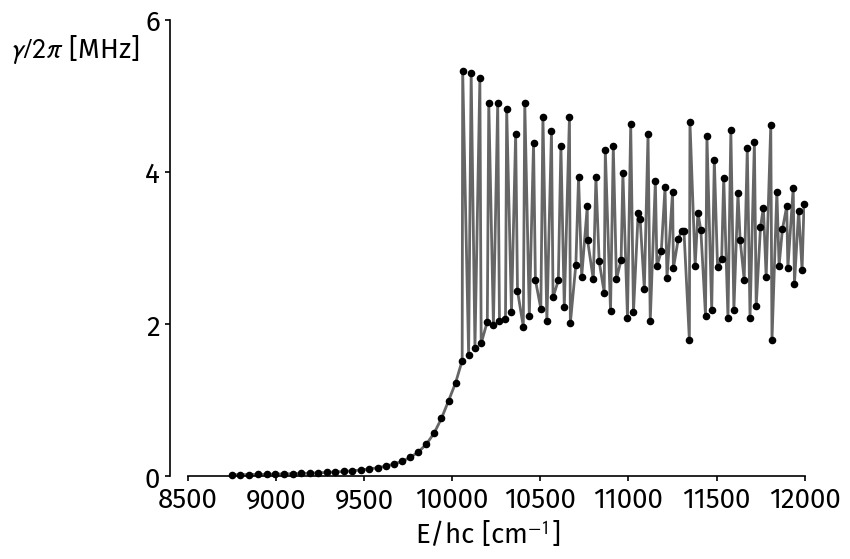

In [41]:
data = parse_duo_transitions(filename="../DUO_output/emission.out")

# Filter for J=0 states
J_mask = data["ji"] == 0
Ei = np.unique(data[J_mask]["ei"])
gamma = np.zeros(Ei.shape)
si_values = np.zeros(Ei.shape, dtype=int)

# For each unique energy level
for i in range(len(Ei)):
    mask = (data["ei"] == Ei[i]) & J_mask
    gamma[i] = np.sum(data["a_if"][mask])
    if np.any(mask):
        si_values[i] = np.argmax(np.bincount(data["si"][mask]))

# Convert to MHz
gamma *= 1e-6/(2*np.pi)

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(Ei, gamma, color="black", alpha=0.6,lw=2)
ax.scatter(Ei, gamma, color="black", s=20, clip_on=False)
ax.set_ylim(0,6)
ax.set_xlim(8400,11800)
ax.set_xticks(np.arange(8500,12001,500, ))
ax.spines["bottom"].set_bounds(8500,12000)
ax.spines["left"].set_bounds(0,6)
ax.set_yticks([0,2,4,6])

ax.set_xlabel("E/hc [cm$^{-1}$]", fontsize=20)
ax.set_ylabel(r"$\gamma / 2\pi$ [MHz]", rotation=0, fontsize=20)
# plt.grid(alpha=0.2)
ax.yaxis.set_label_coords(-0.15, 0.9)  # Adjust these values as needed
ax.set_clip_on(False)
plt.tight_layout()
plt.savefig("lifetime_sans.svg")

# Differential transition width

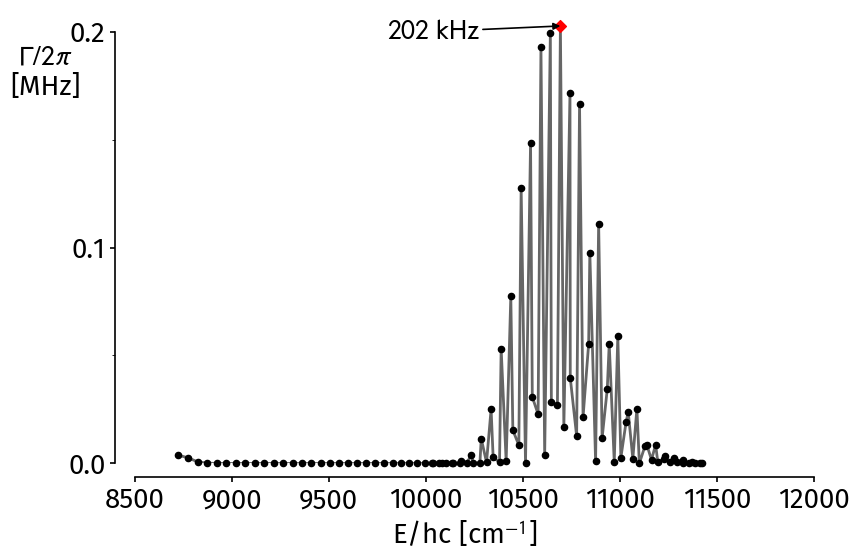

In [ ]:
def calculate_gamma(mu_n, omega_cm1, c0, c1):
    """
    Parameters:
    - mu_n: Computed integral (C1) (in Debye * Angstrom^2 ?)
    - omega_cm1: Transition energy (in cm^-1)
    - c0: Coefficient c0
    - c1: Coefficient c1

    Returns:
    - Gamma: Differential transition width (in Hz)
    """
    # Define physical constants
    epsilon_0 = const.epsilon_0  # Vacuum permittivity in F/m
    hbar = const.hbar           # Reduced Planck constant in J*s
    h = const.h
    c = const.c                 # Speed of light in m/s
    e = const.e              # Elementary charge
    a0 = const.physical_constants['Bohr radius'][0] # Bohr radius in m
    # Convert transition energy to Hz
    omega_J = omega_cm1*100 *h*c
    omega = omega_J/hbar
    # Convert mu to C.m
    mu_coulomb_m = mu_n * 3.33564e-30# * 1e-30

    # Compute the differential transition width Γ
    factor = (4 / 3) * (1 / (4 * np.pi * epsilon_0 * hbar * c**3))
    term = (np.abs(c0)**2 / 3) - (np.abs(c1)**2 / 6)
    Gamma = factor * term * omega**3 * np.abs(mu_coulomb_m)**2

    return Gamma

# plt.rcParams['xtick.minor.width'] = 1.2
# plt.rcParams['ytick.minor.width'] = 1.2
# plt.rcParams['xtick.minor.size'] = 3
# plt.rcParams['ytick.minor.size'] = 3
# plt.rcParams["xtick.labelsize"] = 18
# plt.rcParams["ytick.labelsize"] = 18
data = np.loadtxt("../DUO_output/nroot_100_vmax_300_energies.ener", usecols=[1,2])
energies = data[:,1]
c0, c1 = 0.925, 0.374
roots, I = np.loadtxt("integral/integrals_without_R2.int", unpack=True)
grid = np.loadtxt("grid.dat", skiprows=1)[:,0]
h = (grid[1]-grid[0])
I = I/(h)
Gamma = calculate_gamma(np.abs(I), energies, c0, c1)*1e-6
fac = 2*np.pi

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(energies, Gamma/fac, color="black", alpha=0.6,lw=2)
ax.scatter(energies, Gamma/fac, color="black", s=20, clip_on=False)
ax.set_ylim(0,0.210)
ax.set_xlim(8400,11800)
ax.set_xticks(np.arange(8500,12001,500, ))
ax.spines["bottom"].set_bounds(8500,12000)
ax.spines["left"].set_bounds(0,0.2)
ax.set_yticks([0,0.1,0.2])

ax.spines['bottom'].set_position(('outward', 10))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.set_xlabel("E/hc [cm$^{-1}$]", fontsize=20)
ax.set_ylabel(r"$\Gamma / 2\pi$"+"\n[MHz]", rotation=0, fontsize=20)
# plt.grid(alpha=0.2)
ax.yaxis.set_label_coords(-0.1, 0.8)  # Adjust these values as needed
# ax.set_clip_on(False)

ind = np.argmax(Gamma/fac)
ax.scatter(energies[ind], Gamma[ind]/fac, marker="D", color="red", alpha=1, zorder=10)
ax.annotate(
    r"$202~\text{kHz}$",
    xy=(energies[ind], Gamma[ind]/fac),
    xytext=(9800, 0.2),
    ha="left",
    va="center",
    fontsize=20,
    arrowprops=dict(
        arrowstyle="-|>",       # More stylized than simple "->"
        lw=1.2,
        color="black",
        shrinkA=0, shrinkB=0,
        mutation_scale=10,      # Controls arrowhead size
    ),
    zorder=11
)

ax.set_clip_on(False)


plt.tight_layout()
# plt.savefig("Gamma_sans.svg")


# Wavefunctions

0.01564456000000014
max1 1.559272860382911e-07
max2 2.495287698015064
0.0


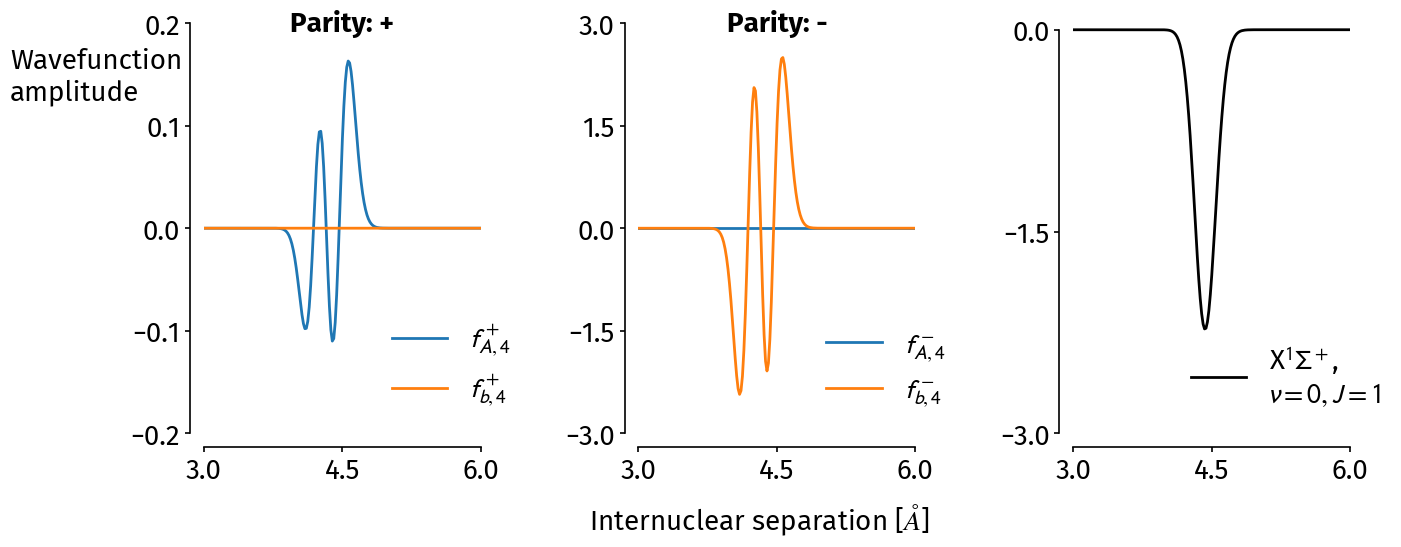

In [49]:
def read_wf(fname, len_grid, root, state, p):
    """
    Read wavefunction data from a file.
    
    Parameters:
    -----------
    fname : str
        Name of the file to read
    len_grid : int
        Length of the grid/wavefunction array
    root : int
        Root number to search for
    state : str
        State name to search for (e.g., "A1Sigma+", "b3pi0", "X1Sigma+")
    
    Returns:
    --------
    wf : numpy.ndarray
        Wavefunction values. Returns None if file can't be opened or data not found.
    """
    # Initialize wavefunction array
    wf = np.zeros(len_grid)
    
    # Create root string to search for
    root_str = f"root={root},"
    p_str = f"p={p},"
    try:
        with open(fname, 'r') as file:
            # Read through file line by line
            found_section = False
            k = 0
            
            for line in file:
                # Check if line contains the state
                if state in line and root_str in line and p_str in line:
                    # Check if this is the correct root
                    found_section = True
                    continue  # Skip to next line to start reading data
                
                # If we're in the correct section, read data
                if found_section:
                    try:
                        # Parse line to get r and wf values
                        parts = line.split()
                        if len(parts) >= 2:
                            tmp_r = float(parts[0])
                            wf[k] = float(parts[1])
                            k += 1
                            
                            # Exit if we've read all expected points
                            if k >= len_grid:
                                break
                    except ValueError:
                        print(f"Error reading data at line {k+1}")
                        break
            
            # If we didn't find the section or read any data, return None
            if not found_section or k == 0:
                return None
                
            # If we didn't read all expected points, resize the array
            if k < len_grid:
                wf = wf[:k]
                
            return wf
                
    except FileNotFoundError:
        print(f"Error: Cannot open file '{fname}'")
        return None
grid = np.loadtxt("grid.dat", skiprows=1)[:,0]
h = grid[1]-grid[0]
print(h)

fig, axes = plt.subplots(ncols=3, figsize=(15,6), sharex=True)

ax = axes[0]

wfA = read_wf("wavefunction/nroot_100_vmax_300.wf", 800, 4, "A1Sigma+", 0)
wfb = read_wf("wavefunction/nroot_100_vmax_300.wf", 800, 4, "b3pi", 0)

ax.plot(grid, wfA/np.sqrt(h), label="$f_{A, 4}^+$", lw=2)
ax.plot(grid, wfb/np.sqrt(h), label="$f_{b, 4}^+$", lw=2)

ax.set_xlim(3,6)
ax.set_xticks([3,4.5,6])
print("max1",np.max(wfb/np.sqrt(h)))
# ax.set_xlabel("Internuclear separation [$\\AA$]")
ax.set_ylabel("Wavefunction\namplitude", rotation=0, ha="left")
ax.yaxis.set_label_coords(-0.7, 0.8)  # Adjust these values as needed
ax.set_ylim(-0.2,0.2)

ax.set_yticks([-0.2, -0.1, 0, 0.1, 0.2])
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.legend(frameon=False, loc="lower right", bbox_to_anchor=(1.2,0))

ax.annotate("Parity: +", (4.5, 0.2), ha="center", va="center", weight="bold")

ax = axes[1]

wfA = read_wf("wavefunction/nroot_100_vmax_300.wf", 800, 4, "A1Sigma+", 1)
wfb = read_wf("wavefunction/nroot_100_vmax_300.wf", 800, 4, "b3pi", 1)

ax.plot(grid, wfA/np.sqrt(h), label="$f_{A, 4}^-$", lw=2)

ax.plot(grid, wfb/np.sqrt(h), label="$f_{b, 4}^-$", lw=2)
print("max2",np.max(wfb/np.sqrt(h)))
ax.set_xlim(3,6)
ax.set_xticks([3,4.5,6])
print(np.trapezoid((wfA), grid))
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_ylim(-3,3)
ax.set_yticks([-3, -1.5, 0, 1.5, 3])
ax.legend(frameon=False, loc="lower right", bbox_to_anchor=(1.2,0))
ax.annotate("Parity: -", (4.5, 3), ha="center", va="center", weight="bold")

fig.supxlabel("Internuclear separation [$\\AA$]", fontsize=18, x=0.6, y=0.07)


ax = axes[2]
wfX = np.loadtxt("wavefunction/X.wf", skiprows=1, usecols=1)
ax.plot(grid, wfX/np.sqrt(h), label=r"X$^1\Sigma^+$,"+ "\n"+r"$\nu=0, J=1$", color="black", lw=2)
ax.set_xlim(3,6)
ax.set_xticks([3,4.5,6])
# print(np.trapezoid((wfX), grid))
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_ylim(-3,0.05)
ax.set_yticks([-3, -1.5, 0])
ax.spines["left"].set_bounds(-3,0)
ax.legend(frameon=False, loc="lower right", bbox_to_anchor=(1.2,0))
ax.annotate("Parity: -", (4.5, 3), ha="center", va="center", weight="bold")
# ax.annotate(,(5,-2))

fig.supxlabel("Internuclear separation [$\\AA$]", fontsize=20, x=0.55, y=0.07)




plt.tight_layout()
# plt.savefig("wf_sans.svg")

# Compute ratios

81 correspondances trouvées avec une tolérance de 0.01.


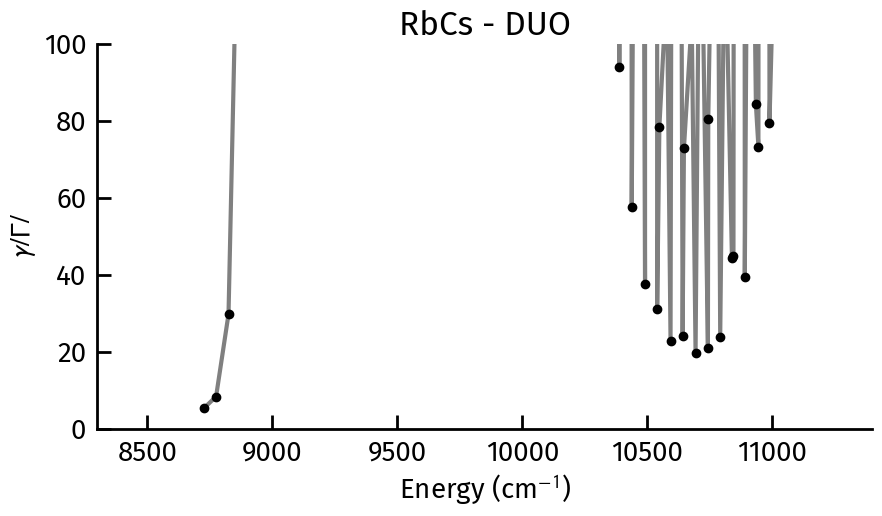

In [53]:
# Charger les données
Eg, g = np.loadtxt("data/lifetime.txt", skiprows=1, unpack=True)
EG, G = np.loadtxt("data/Gamma.txt", skiprows=1, unpack=True)
Eg = Eg-24.794637558396 #ZPE
# Tolérance d'appariement (en cm⁻¹)

tol = 1e-2
# Listes pour stocker les résultats
ratios = []
energies_matched = []
Eg_list = []
EG_list = []
g_list, G_list = [], []
# Appariement avec tolérance
for i, E1 in enumerate(Eg):
    matches = np.where(np.abs(EG - E1) < tol)[0]
    
    if len(matches) > 0:
        j = matches[np.argmin(np.abs(EG[matches] - E1))]
        ratio = g[i] / G[j]
        ratios.append(ratio)
        energies_matched.append((E1 + EG[j]) / 2)  # ou E1
        g_list.append(g[i])
        G_list.append(G[j])
        Eg_list.append(E1)
        EG_list.append(EG[j])

# Convertir en array
energies_matched = np.array(energies_matched)
ratios = np.array(ratios)
Eg_list = np.array(Eg_list)
EG_list = np.array(EG_list)
g_list, G_list = np.array(g_list), np.array(G_list)

# Sauvegarder dans un fichier texte
np.savetxt(
    "data/ratio_g_over_G.txt",
    np.column_stack((energies_matched, ratios, Eg_list, EG_list, g_list, G_list)),
    header="E_avg\tg/G\tEg\tEG\tgamma\tGamma",
    fmt="%.10e"
)

print(f"{len(ratios)} correspondances trouvées avec une tolérance de {tol}.")


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(energies_matched, ratios, marker="o", markeredgecolor="black", markerfacecolor="black", color="gray", lw=3, label="1000 grid points")


# ax.plot(X, Y, marker="o", markeredgecolor="green", markerfacecolor="green", color="lightgreen", lw=3, label="800 points", alpha=0.5)
# ax.set_ylim(0,7)
ax.set_xlim(8300,11400)
ax.set_xlabel('Energy (cm$^{-1}$)')
ax.set_ylabel(r'$\gamma/\Gamma/$')
ax.set_title("RbCs - DUO")
# ax.legend()

ax.tick_params(axis='both', which='major', direction='in', top=False, right=False, labelsize=20, length=10, width=2, pad=8)
ax.tick_params(axis='both', which='minor', direction='in', top=False, right=False, length=6, width=1, pad=2)
ax.set_ylim(0,100)
for spine in ax.spines.values():
    spine.set_linewidth(2)
